Mount the drive in to colab

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the libries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Import the dataset

In [116]:
# Assuming your dataset is in a CSV file named 'dataset.csv', you can read it into a pandas DataFrame as follows:
dataset=pd.read_csv('/content/drive/MyDrive/Prodigy_InfoTech/Task_01_House_Price_Prediction/dataset.csv')

In [117]:
# Let's take a look at the first few rows of the dataset to understand its structure
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#Data Analysis

In [118]:
#Check the columns in the dataset
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [119]:
#To display a summery of the DataFrame.It provides DataFrame's columns, their data types, the number of non-null values, and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Select only the numerical columns

In [120]:
dataset.dtypes[dataset.dtypes != 'object']

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [121]:
#to generate descriptive statistics of a DataFrame numeric columns.
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [122]:
#number of missing values (NaN) in each column of the DataFrame
#dataset.isnull()
dataset.isnull().sum()


#Fill Missing Values
#dataset['bedrooms']=dataset['bedrooms'].fillna(dataset['bedrooms'].mean())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

calculates correlations between numerical columns.

<ipython-input-123-3f7210e4ac52>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


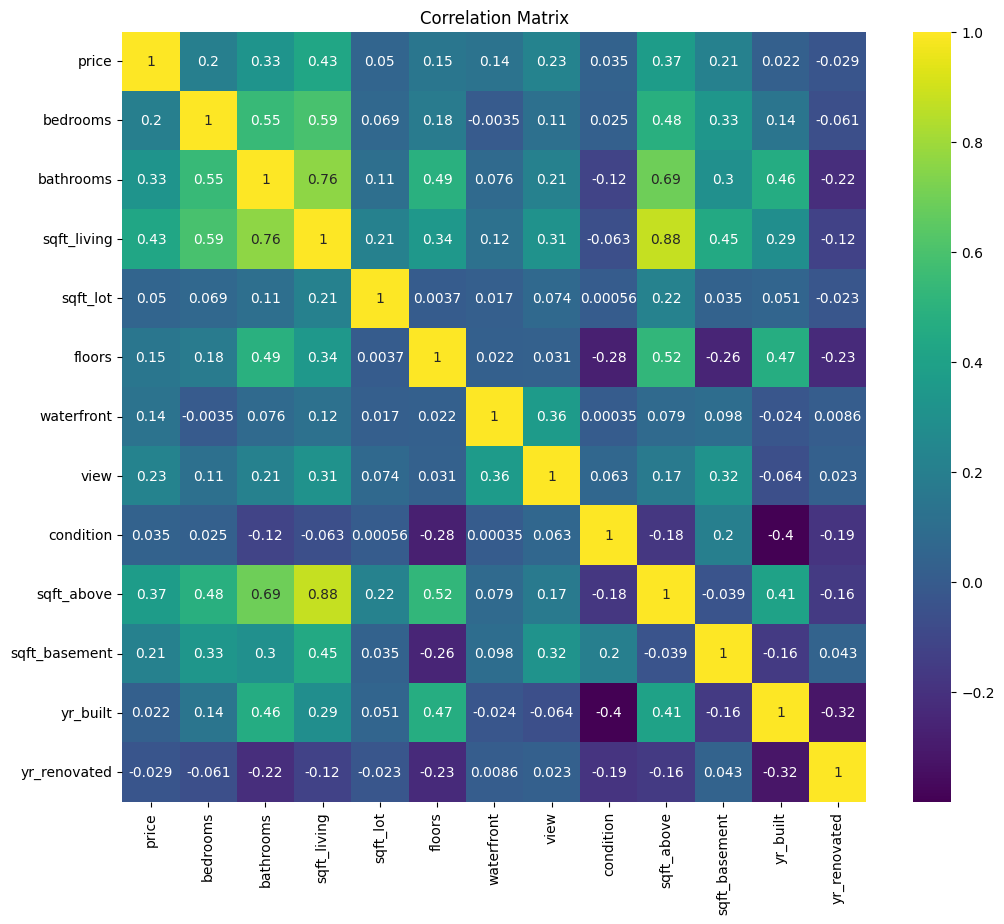

In [123]:
# Correlation matrix to understand feature relationships
#cmap=color map
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [124]:
dataset.corr()['price']

<ipython-input-124-3a9b2166e09b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['price']


price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

Graphs

In [125]:
x_axis=dataset["bedrooms"]
y_axis=dataset["price"]

#bathrooms,sqft_living,sqft_lot....

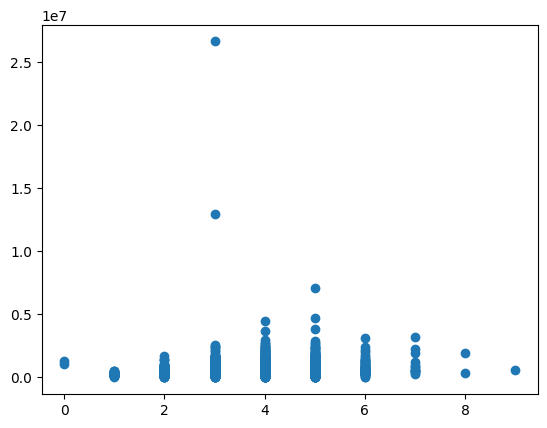

In [126]:
plt.scatter(x_axis,y_axis)

Check the value counts in columns

In [127]:
#create a list using dataset columns
column_names = dataset.columns.tolist()

# Access a column using its name
column_nb = 17

# Count the occurrences of each unique value in the column
value_counts = dataset[column_names[column_nb]].value_counts()
print("column name: " , dataset.columns[column_nb])
print(value_counts)

#Aliter: to check unique values in a column
#dataset['bedrooms'].unique()

column name:  country
USA    4600
Name: country, dtype: int64


Checked the columns value counts and drop unnessary columns. (if value counts are big)

# Preprocessing: Selecting features and target variable

In [128]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','sqft_basement','yr_built']]
y = dataset['price']

Splitting the dataset into training and testing sets

In [129]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42 , shuffle=False)

#if you run the code twice,Both times, you'll get the same training and testing sets,
#given that random_state is set to 42. If you omit the random_state parameter or
#set it to None, the split will be random and different each time you run the code.

#shuffle means the data will not be randomly shuffled before splitting.

#Building the Linear Regression Model:

In [130]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Fit the model on the training data
model.fit(X_train ,y_train)

LinearRegression()

#Model Evaluation:

In [131]:
#Prediction

y_predictions= model.predict(X_test)
print(y_predictions)

[1066329.53822036  489304.29893357 1353485.31728578  306407.37114361
  702899.74707658  464468.17215283  299729.58383999  520510.59975743
  868087.20763631  554999.75626065  660107.41370142  448741.55448467
  633626.32787164  926534.96245682  236944.23576451 1081078.68668991
  905715.05737946  889896.92436481  499189.38231447 1133557.35377516
  926972.42747392  439038.46725953 1096629.04537365  786465.25866414
  303983.4729407   869275.08796354  246704.5041901   714151.81320516
  427950.98403568  951796.22797522  429408.24084709  507656.07229419
  461701.45384004  393054.65313627  714226.22993783  389525.79891039
  651712.35626473  563513.0187798   353064.35064732  236381.37244223
  830855.40737971  840309.3989866   393248.10274854  234922.31411092
  917593.40575729  376474.30145397  430428.54115945  378510.79663005
  426895.89475087 1981265.32686689  381876.62421576  589935.70604344
  644885.52386765  575227.83680304  279947.17139718  230105.25476933
  323498.56686719  509457.99889575

Create a dataset to check variance

In [132]:
Final_dataset=pd.DataFrame({
    'actual_values':y_test ,'predictions_values': y_predictions
})

Final_dataset=Final_dataset.reset_index(drop=True)
Final_dataset

,actual_values,predictions_values
0,5.000000e+05,1.066330e+06
1,5.700000e+05,4.893043e+05
2,1.309500e+06,1.353485e+06
3,5.440000e+05,3.064074e+05
4,4.390000e+05,7.028997e+05
...,...,...
915,3.081667e+05,4.109814e+05
916,5.343333e+05,3.807383e+05
917,4.169042e+05,7.572249e+05
918,2.034000e+05,4.127538e+05


Check the accuracy

In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

#Mean squared Error
mse = mean_squared_error(y_test,y_predictions)
print("Mean Squared Error : ",mse)

#RMSE
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)

# R-squared
r2 = r2_score(y_test, y_predictions)
print("R-squared:", r2)

#MAPE
mape =mean_absolute_percentage_error(y_test, y_predictions)
print("MAPE : ", mape)

Mean Squared Error :  1038830347985.704
Root Mean Squared Error :  1019230.2723063636
R-squared: 0.014552118857412588
MAPE :  1.89813869506211e+20


#Predictions and Visualization

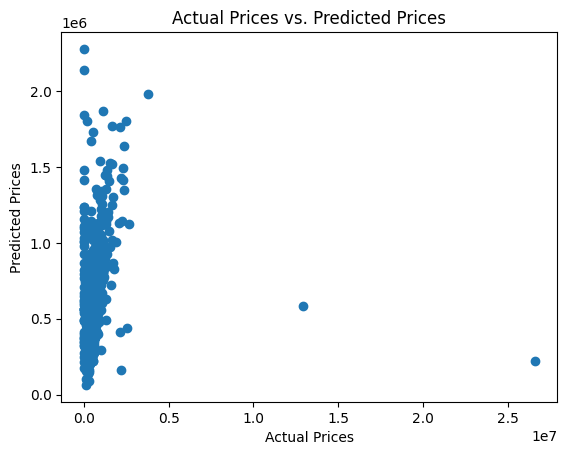

Text(0, 0.5, 'Residuals')

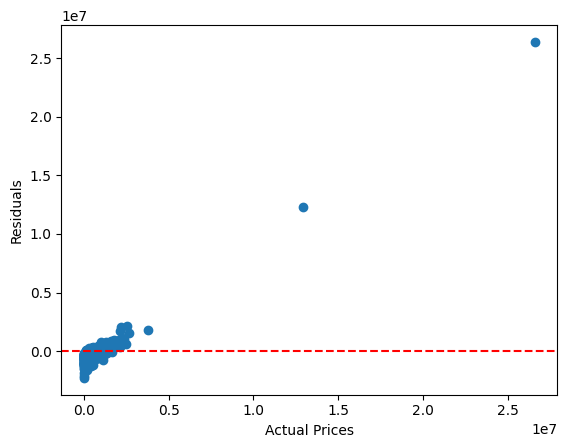

In [134]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
plt.scatter(y_test, y_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_predictions
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")

#Prediction

In [136]:
X_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built'],
      dtype='object')

In [140]:

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3,1000,2004]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])


Predicted Price: 216183.37211883813


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
